# Data in Julia

Some (but not all!) popular packages for data representation, manipulation, and visualization

# Database Interaction

C wrappers and full Julia implementations for many databases, such as
+ SQLite.jl
+ MySQL.jl
+ Mongo.jl
+ LibPQ.jl

In [30]:
using DataFrames

## DataFrames.jl

Similar to pandas in Python, DataFrames is a library for data representation and manipulation

In [31]:
names = DataFrame(ID = [20, 40], Name = ["John Doe", "Jane Doe"])

,ID,Name
,Int64,String
1,20,John Doe
2,40,Jane Doe


In [32]:
jobs = DataFrame(ID = [20, 40], Job = ["Lawyer", "Doctor"])

,ID,Job
,Int64,String
1,20,Lawyer
2,40,Doctor


A DataFrame isn't a matrix, it operates more like a database. For example, you can do joins with DataFrames

In [33]:
join(names, jobs, on = :ID)

,ID,Name,Job
,Int64,String,String
1,20,John Doe,Lawyer
2,40,Jane Doe,Doctor


In [34]:
using RDatasets

## RDatasets.jl

Many sample datasets that are included in R and others that are popular in R

In [35]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [36]:
sort!(iris, :PetalLength)
ismall = head(iris, 4)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,4.6,3.6,1.0,0.2,setosa
2,4.3,3.0,1.1,0.1,setosa
3,5.8,4.0,1.2,0.2,setosa
4,5.0,3.2,1.2,0.2,setosa


In [37]:
using Query

## Query.jl

Allows for querying many data structures, including DataFrames, to create new DataFrames or matrices

In [38]:
queried = @from i in ismall begin
    @where i.SepalWidth < 4.2 && i.SepalLength > 5.4
    @select {i.SepalWidth, i.SepalLength, i.Species}
    @collect DataFrame
end

,SepalWidth,SepalLength,Species
,Float64,Float64,Categorical…
1,4.0,5.8,setosa


We can also do this with logical indexing, using the different columns as Arrays

In [39]:
x = ismall[:SepalWidth] .< 4.2

4-element BitArray{1}:
 true
 true
 true
 true

In [40]:
y = ismall[:SepalLength] .> 5.4

4-element BitArray{1}:
 false
 false
  true
 false

In [41]:
indices = x .* y

4-element BitArray{1}:
 false
 false
  true
 false

In [42]:
queried

,SepalWidth,SepalLength,Species
,Float64,Float64,Categorical…
1,4.0,5.8,setosa


In [43]:
ismall[:SepalLength][indices]

1-element Array{Float64,1}:
 5.8

In [44]:
using Gadfly

## Gadfly.jl

A popular pure-Julia data visualization package. Other options include PyPlot.jl (wrapper of matplotlib), GR.jl (wrapper of GR), and Plots.jl (meta-wrapper)

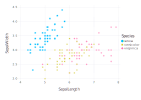

In [45]:
plot(iris, x="SepalLength", y="SepalWidth", color="Species", shape="Species", Geom.point)

In [46]:
using Distributions

In [47]:
X = rand(MultivariateNormal([0.0, 0.0], [1.0 0.5; 0.5 1.0]), 10000);
println(X[1:10])

[1.28396, 0.786187, -0.0201795, 0.995887, 0.449988, -0.0982218, -0.833681, -0.505184, 1.80533, 1.99911]


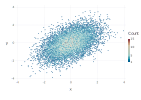

In [48]:
plot(x=X[1,:], y=X[2,:], Geom.hexbin)